In [24]:

import os
import sys
from pathlib import Path

home = str(Path.home())
module_path1 = os.path.join(home + '\\PycharmProjects\\EntroPy')
module_path2 = os.path.join(home + '\\PycharmProjects\\EntroPy\\venv\\Lib\\site-packages')

if module_path1 not in sys.path:
    sys.path.append(module_path1)

if module_path2 not in sys.path:
    sys.path.append(module_path2)


In [25]:
from information.bitpy import BitPy
from information.entropy import EntroPy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [26]:
prices = pd.read_csv('\\PycharmProjects\\EntroPy\\resources\\stock_prices\\stock_prices_750.txt', sep='\t', header=0)

In [27]:
num_stocks = 50
prices = prices.drop(['Date'], axis=1)
prices = pd.DataFrame(prices.iloc[:, :num_stocks])
prices.head()

,A,AAL,AAMC,AAN,AAOI,AAON,AAP,AAWW,ABAX,ABBV,...,AEE,AEGN,AEIS,AEL,AEO,AEP,AERI,AES,AET,AF
0,36.95,59.86,790.00,27.90,12.58,19.03,102.34,37.52,34.57,42.07,...,30.76,21.45,23.34,23.13,14.19,40.27,11.49,12.71,65.59,13.31
1,36.76,58.17,885.00,28.20,12.31,18.85,106.38,37.58,34.64,43.44,...,30.97,21.30,23.16,23.71,14.40,40.47,12.01,13.07,64.80,13.17
2,37.21,56.82,885.00,28.37,12.89,19.12,104.98,37.17,34.56,43.18,...,31.18,20.97,22.97,23.33,14.06,40.46,13.60,13.45,63.51,13.15
3,37.15,58.07,875.00,28.56,13.12,19.31,104.22,37.54,34.90,43.26,...,30.78,20.81,22.37,23.62,14.30,40.14,14.35,12.95,62.09,13.06
4,38.07,58.59,893.99,28.56,14.37,19.92,103.83,37.46,35.26,44.64,...,31.08,20.86,22.43,23.77,12.95,40.67,15.35,13.19,63.25,13.14


In [28]:
columns = prices.columns.values
num_cols = len(columns)
mi_matrix = np.zeros((num_cols, num_cols))

In [29]:
columns

array(['A', 'AAL', 'AAMC', 'AAN', 'AAOI', 'AAON', 'AAP', 'AAWW', 'ABAX',
       'ABBV', 'ABC', 'ABCB', 'ABCO', 'ABG', 'ABM', 'ABMD', 'ABT', 'ACAD',
       'ACCO', 'ACET', 'ACGL', 'ACHC', 'ACHN', 'ACIW', 'ACLS', 'ACM',
       'ACN', 'ACOR', 'ACRX', 'ACTG', 'ACXM', 'ADBE', 'ADI', 'ADM', 'ADP',
       'ADS', 'ADSK', 'ADTN', 'ADUS', 'AE', 'AEE', 'AEGN', 'AEIS', 'AEL',
       'AEO', 'AEP', 'AERI', 'AES', 'AET', 'AF'], dtype=object)

In [30]:
bins = 16
for i in range(num_cols):
    for j in range(num_cols):
        if i != j:
            istock = prices[[columns[i]]]
            jstock = prices[[columns[j]]]
            mi_matrix[i, j] = EntroPy.mutual_information(istock, jstock, bins=bins) / math.log2(bins)

In [31]:
mi_matrix = pd.DataFrame(mi_matrix, columns=columns)
mi_matrix.index = columns
mi_matrix.head()

,A,AAL,AAMC,AAN,AAOI,AAON,AAP,AAWW,ABAX,ABBV,...,AEE,AEGN,AEIS,AEL,AEO,AEP,AERI,AES,AET,AF
A,0.000000,0.176415,0.190645,0.253525,0.289783,0.341427,0.261553,0.248087,0.171228,0.315180,...,0.404255,0.189866,0.415232,0.216612,0.232659,0.341553,0.336954,0.205677,0.357645,0.368105
AAL,0.176415,0.000000,0.175331,0.184258,0.172769,0.253603,0.180136,0.222917,0.169498,0.174393,...,0.251119,0.128084,0.225140,0.199309,0.139590,0.231282,0.239395,0.155098,0.255797,0.235656
AAMC,0.190645,0.175331,0.000000,0.214910,0.141158,0.260651,0.264484,0.233452,0.256307,0.252674,...,0.303565,0.157267,0.247847,0.211271,0.242135,0.323072,0.227566,0.228507,0.359109,0.287729
AAN,0.253525,0.184258,0.214910,0.000000,0.199685,0.253830,0.243729,0.223489,0.187381,0.223270,...,0.277628,0.173478,0.287924,0.213601,0.164072,0.273356,0.223109,0.167757,0.301055,0.316343
AAOI,0.289783,0.172769,0.141158,0.199685,0.000000,0.255835,0.198757,0.234100,0.135897,0.231253,...,0.289605,0.189834,0.312642,0.159617,0.162222,0.261642,0.304296,0.166528,0.283709,0.279548


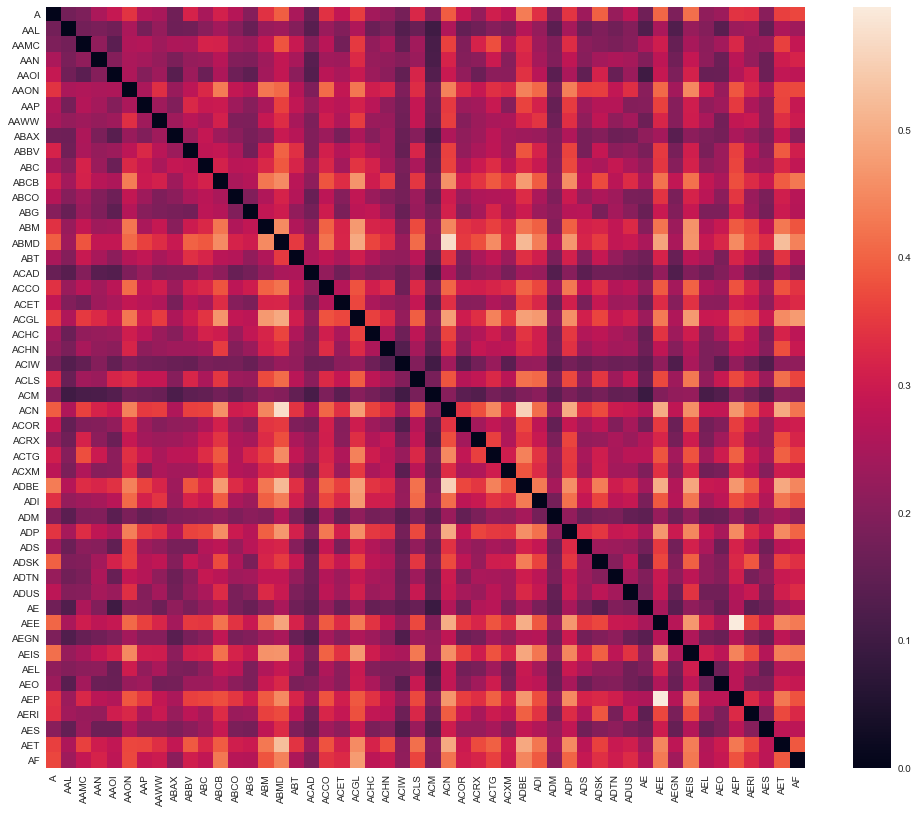

In [32]:
import seaborn as sns
sns.set(rc={'figure.figsize':(17,14)})
ax = sns.heatmap(mi_matrix, annot=False)

In [33]:
mi_matrix = mi_matrix.sum().sort_values(ascending=False)
mi_matrix = mi_matrix
mi_matrix

ADBE    17.891605
ABMD    17.877156
ACN     17.824343
ACGL    17.119075
AEE     17.095310
AET     16.952584
ADP     16.712452
AEIS    16.654996
AEP     16.478080
ABCB    16.052858
ABM     15.799696
AF      15.664205
ADI     15.570583
AAON    15.555750
ACCO    15.148049
ACTG    15.119274
ACLS    14.353214
ADSK    13.803473
AERI    13.745570
A       13.734296
ABC     13.550264
ABBV    13.020938
ACRX    12.977333
ACHC    12.903387
ACXM    12.900645
AAP     12.748604
ABT     12.589358
AAWW    12.499573
ACET    12.424013
ACHN    12.336075
AAMC    12.246255
ACOR    12.184184
ADUS    11.994198
ABCO    11.861391
ADS     11.766859
ADTN    11.638058
AAN     11.376568
ABG     11.361099
AEL     11.023121
AEO     10.806071
AAOI    10.783915
AES     10.774799
ABAX    10.487170
AEGN    10.115246
AAL      9.512732
AE       9.435468
ACAD     9.330220
ADM      9.294528
ACIW     8.728491
ACM      8.007411
dtype: float64